In [73]:
import numpy as np 
import numpy.ma as ma
import cv2 # note: opencv imports image color channels as BGR instead of RGB
import os
import random 
import matplotlib.pyplot as plt
import time

In [74]:
IMGPATH = os.path.expanduser("~/Documents/Skyseed/data/multispectral_testarea_2d_9m/map/")
RESPATH = os.path.expanduser("~/Documents/Skyseed/image-classification/reports/segmentation/kmeans/")

# randfile = random.choice(os.listdir(IMGPATH))
randfile = "result.png"

# set hyperparamters 
K = 3 # number of clusters to find
MAX_ITER = 100 # max number of iterations
EPSILON = 0.001 # convergence tolerance
filter_threshold = [0,0,0] # [B,G,R] thresholds for dark pixel filtering

# load and reshape
img = cv2.imread(os.path.join(IMGPATH, randfile))
img.shape

(6693, 9115, 3)

In [84]:
img_flat = img.reshape((-1, 3))
img_flat = np.float32(img_flat)

flat_dim = img_flat.shape
flat_dim

(61006695, 3)

In [93]:
# mask black pixels at margins
rowmask = np.all(ma.masked_equal(img_flat, 0).mask, axis = 1)

img_flat_masked = ma.array(img_flat, mask=np.column_stack([rowmask]*flat_dim[1])) 
img_flat_masked.shape

(61006695, 3)

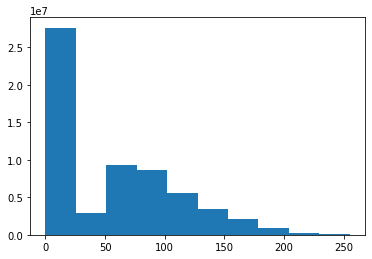

In [92]:
# look at dist of different color channels (B-0, G-1, R-2)
plt.hist(img_flat_masked[~np.array(rowmask), 0])
plt.show()

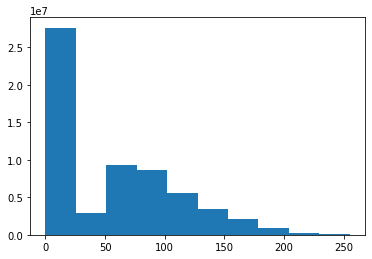

In [78]:
plt.hist(img_flat[:,0])
plt.show()

In [80]:
# run estimation
ret, label, center = cv2.kmeans(img_flat_masked[~np.array(rowmask), :], K, None,
                                criteria=((cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER), MAX_ITER, EPSILON),
                                attempts=10,
                                flags=cv2.KMEANS_PP_CENTERS)

# look at centroids
center = np.uint8(center)
print(center)                            

[[24]
 [43]
 [35]]


In [47]:
# get array of bgr colored segments
segmented = center[label.flatten()]

# re-insert black pixels: replace non-masked values in original masked array with array segmented

# possible functions that could work EFFICIENTLY here

# np.put_along_axis()
# np.put
# np.copyto
# np.putmask


(61006695, 3) (61006695, 3)


In [ ]:
res_img = res.reshape((img.shape))
res_img.shape

In [14]:
# save both original and segmented image to RESPATH
if randfile[:-4] + "_original.png" not in os.listdir(RESPATH):
    cv2.imwrite(os.path.join(RESPATH, randfile[:-4] + "_original.png"), img)
cv2.imwrite(os.path.join(RESPATH, randfile[:-4] + "_segmented_k=" + str(K) + ".png"), res_img)

True